<span style='color:Blue'>

# Student Response
    
## Summary
Used pycaret autoML on the churn data set noting it found an "SVM - Linear Kernal" model as the best.  I did a bit of reasearch on support vector machine models, but need to learn more, it was a bit confusing for me.  I saved the best model as a pkl file and then loaded it again to run on the additional test data.  I used the model to predict the five outcomes and presented the results in a confustion matrix. Last I loaded the pkl file to Gitbu in the link below.
    
https://github.com/fkhandley/MSDS600
    
## Optional Challenges
I was able to get the probabilities for the new predictions, but I could not figure out how to get it's place in the distribution of probabilities from the training dataset.
I then wanted to try H2O's autoML capabilities, but found it would not run in the pycaret kernal, so I had to use a second notebook.  H2O used an ensamble approach, but did not perform any better on the additional test data that was provided.  



In [1]:
import pandas as pd

import numpy as np

from pycaret.classification import ClassificationExperiment

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r'C:\Users\Trey\Regis\MSDS600 Intro to Data Science\Week 2\Churn_edited.csv',index_col='customerID')
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,avg_charge,TotalCharges_Check
customerID,,,,,,,,,
7590-VHVEG,1,1,0,0,29.85,29.85,0,29.850000,0.00
5575-GNVDE,34,0,1,1,56.95,1889.50,0,55.573529,46.80
3668-QPYBK,2,0,0,1,53.85,108.15,1,54.075000,-0.45
7795-CFOCW,45,1,1,2,42.30,1840.75,0,40.905556,62.75
9237-HQITU,2,0,0,0,70.70,151.65,1,75.825000,-10.25


In [4]:
df_trimmed = df.drop(['avg_charge','TotalCharges_Check'],axis=1)
df_trimmed

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,1,0,0,29.85,29.85,0
5575-GNVDE,34,0,1,1,56.95,1889.50,0
3668-QPYBK,2,0,0,1,53.85,108.15,1
7795-CFOCW,45,1,1,2,42.30,1840.75,0
9237-HQITU,2,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...
6840-RESVB,24,0,1,1,84.80,1990.50,0
2234-XADUH,72,0,1,3,103.20,7362.90,0
4801-JZAZL,11,1,0,0,29.60,346.45,0


In [5]:
automl = ClassificationExperiment()

In [6]:
automl.setup(df_trimmed,target='Churn')

,Description,Value
0,Session id,8368
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 7)"
4,Transformed data shape,"(7032, 7)"
5,Transformed train set shape,"(4922, 7)"
6,Transformed test set shape,"(2110, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [7]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8025,0.8398,0.5061,0.6724,0.5767,0.4513,0.4595,0.2140
lr,Logistic Regression,0.8009,0.8374,0.5367,0.6543,0.5887,0.4592,0.4638,0.8670
ridge,Ridge Classifier,0.7987,0.0000,0.4717,0.6738,0.5546,0.4297,0.4413,0.0130
ada,Ada Boost Classifier,0.7970,0.8375,0.5076,0.6533,0.5708,0.4407,0.4470,0.0870
lda,Linear Discriminant Analysis,0.7944,0.8245,0.5122,0.6429,0.5696,0.4369,0.4421,0.0150
lightgbm,Light Gradient Boosting Machine,0.7905,0.8269,0.5023,0.6355,0.5600,0.4252,0.4309,0.1150
rf,Random Forest Classifier,0.7790,0.8085,0.5061,0.6010,0.5485,0.4038,0.4070,0.2140
et,Extra Trees Classifier,0.7688,0.7877,0.5031,0.5748,0.5360,0.3831,0.3849,0.1550
knn,K Neighbors Classifier,0.7657,0.7465,0.4472,0.5781,0.5037,0.3537,0.3590,0.0270
qda,Quadratic Discriminant Analysis,0.7517,0.8275,0.7401,0.5238,0.6130,0.4381,0.4528,0.0130


In [8]:
automl.save_model(best_model,'Churn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('...
                                        

In [9]:
new_pycaret = ClassificationExperiment()

In [10]:
loaded_model = new_pycaret.load_model('Churn_model')

Transformation Pipeline and Model Successfully Loaded


In [11]:
new_churn = pd.read_csv(r'new_churn_data.csv')
new_churn

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure
0,9305-CKSKC,22,1,0,2,97.40,811.70,36.895455
1,1452-KNGVK,8,0,1,1,77.30,1701.95,212.743750
2,6723-OKKJM,28,1,0,0,28.25,250.90,8.960714
3,7832-POPKP,62,1,0,2,101.70,3106.56,50.105806
4,6348-TACGU,10,0,0,1,51.15,3440.97,344.097000


In [11]:
new_churn = pd.read_csv(r'new_churn_data.csv')
new_churn_trimmed = new_churn.drop('charge_per_tenure',axis=1)
new_churn_trimmed

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,9305-CKSKC,22,1,0,2,97.40,811.70
1,1452-KNGVK,8,0,1,1,77.30,1701.95
2,6723-OKKJM,28,1,0,0,28.25,250.90
3,7832-POPKP,62,1,0,2,101.70,3106.56
4,6348-TACGU,10,0,0,1,51.15,3440.97


In [12]:
y_pred = predictions = loaded_model.predict(new_churn_trimmed)

In [13]:
y_true = [1,0,0,1,0]

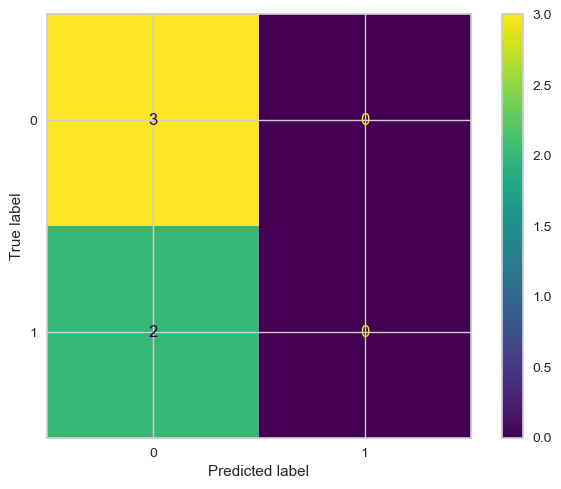

In [14]:
cm = (confusion_matrix(y_true,y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [15]:
loaded_model.predict_proba(new_churn_trimmed)

array([[0.52497076, 0.47502924],
       [0.82392782, 0.17607218],
       [0.64160105, 0.35839895],
       [0.93412134, 0.06587866],
       [0.53720457, 0.46279543]])

In [16]:
y_pred

array([0, 0, 0, 0, 0], dtype=int8)

In [21]:
df_trimmed2 = df_trimmed.drop(['Churn'],axis=1)
df_trimmed2

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,1,0,0,29.85,29.85
1,5575-GNVDE,34,0,1,1,56.95,1889.50
2,3668-QPYBK,2,0,0,1,53.85,108.15
3,7795-CFOCW,45,1,1,2,42.30,1840.75
4,9237-HQITU,2,0,0,0,70.70,151.65
...,...,...,...,...,...,...,...
7027,6840-RESVB,24,0,1,1,84.80,1990.50
7028,2234-XADUH,72,0,1,3,103.20,7362.90
7029,4801-JZAZL,11,1,0,0,29.60,346.45
7030,8361-LTMKD,4,0,0,1,74.40,306.60


In [27]:
loaded_model.predict(df_trimmed2)

array([1, 0, 1, ..., 0, 1, 0], dtype=int8)

In [28]:
loaded_model.predict_proba(df_trimmed2)

array([[4.38426299e-01, 5.61573701e-01],
       [9.76391752e-01, 2.36082478e-02],
       [4.11517055e-02, 9.58848294e-01],
       ...,
       [7.04240490e-01, 2.95759510e-01],
       [2.87323772e-02, 9.71267623e-01],
       [9.99998259e-01, 1.74069093e-06]])

In [24]:
y_pred2

array([1, 0, 1, ..., 0, 1, 0], dtype=int8)